In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

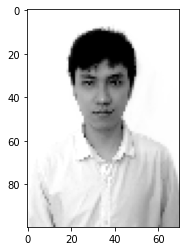

In [2]:
img=cv2.imread('huy.jpg', 0)
img = cv2.resize(img,(70,100))
m,n = img.shape[:2]
plt.imshow(img, cmap='gray')


# Thêm nhiễu cho ảnh

In [3]:
# Thêm nhiễu Gaussian 
gia_tri_TB = 10
phuong_sai = 25
noise = np.random.normal(loc=gia_tri_TB,scale=phuong_sai,size=(m,n))
Gau_noisy_img = img + noise

In [4]:
# Thêm nhiễu Rayleigh v
phuong_sai = 40
noise = np.random.rayleigh(scale=phuong_sai,size=(m,n))
Ray_noisy_img = img + noise

In [5]:
# Thêm nhiễu Erlang (Gammar) 
K = 2.0
phuong_sai = 18
noise = np.random.gamma(shape=K,scale=phuong_sai,size=(m,n))
Gam_noisy_img = img + noise

In [6]:
# Thêm nhiễu hàm mũ 
phuong_sai = 26
noise = np.random.exponential(scale=phuong_sai,size=(m,n))
Exp_noisy_img = img + noise

In [7]:
# Thêm nhiễu Uniform 
a,b = 10,100
noise = np.random.uniform(low=a,high=b,size=(m,n))
Uni_noisy_img = img + noise

In [8]:
# Thêm nhiễu muối tiêu (add salt and pepper)
number_black = int(m*n*0.05)  # định nghĩa số điểm đen
number_white = int(m*n*0.05)  # định nghĩa số điểm trắng
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..m
# Giá trị này sẽ biểu diễn tọa độ điểm đen theo hàng
m_blacks = np.random.randint(0,m,number_black)
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..n
# Giá trị này sẽ biểu diễn tọa độ điểm đen theo cột
n_blacks = np.random.randint(0,n,number_black)
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..m
# Giá trị này sẽ biểu diễn tọa độ điểm trắng theo hàng
m_whites = np.random.randint(0,m,number_white)
# Lấy giá trị nguyên ngẫu nhiên trong đoạn 0..n
# Giá trị này sẽ biểu diễn tọa độ điểm trắng theo cột
n_whites = np.random.randint(0,n,number_white)

SP_noisy_img = np.copy(img) # Sao chép ảnh img để tạo ảnh SP_noisy_img
# Thiết lập mức xám = 0 (điểm đen) cho điểm ảnh có tọa độ (m_blacks,n_blacks)
SP_noisy_img[m_blacks,n_blacks] = 0
# Thiết lập mức xám = 255 (điểm trắng) cho điểm ảnh có tọa độ (m_whites,n_whites)
SP_noisy_img[m_whites,n_whites] = 255

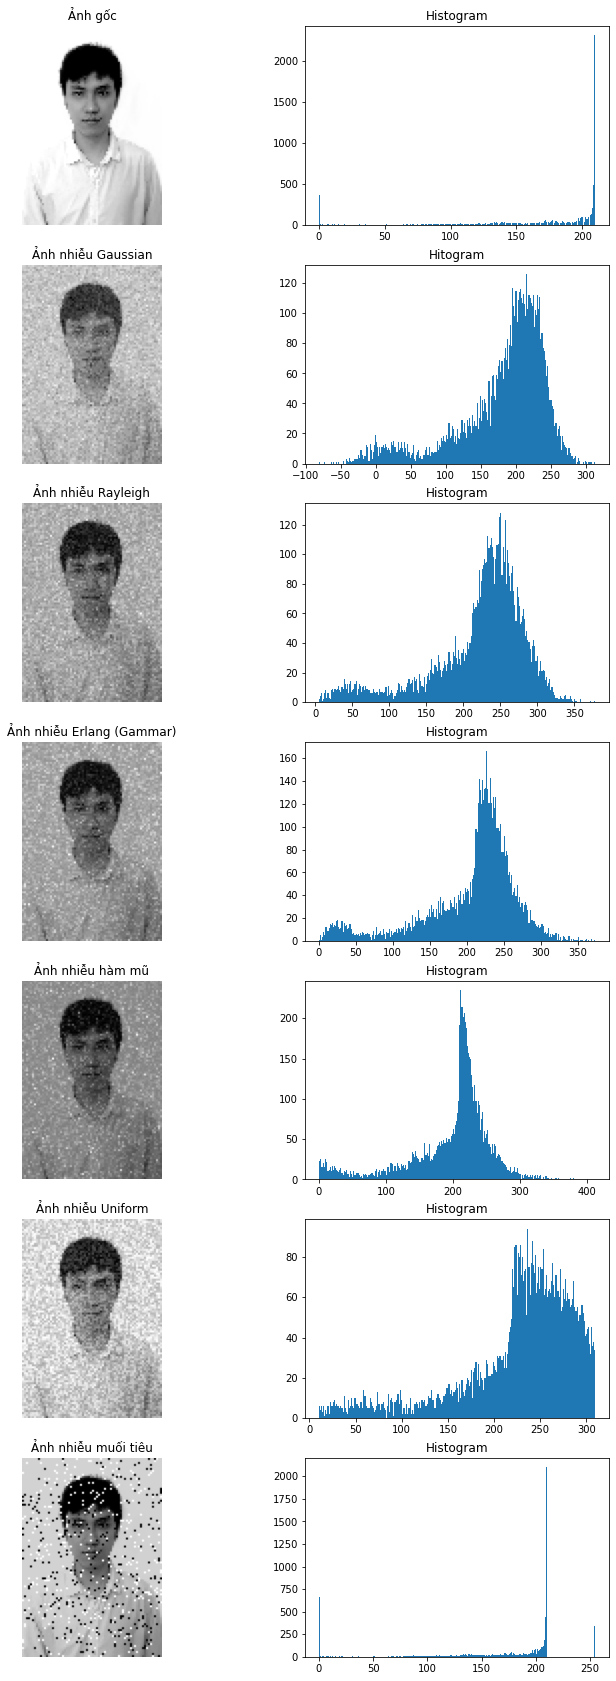

In [9]:


fig1 = plt.figure(figsize=(12, 30))

(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14) = fig1.subplots(7, 2)

ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')

ax2.hist(img.flatten(),bins=256)
ax2.set_title('Histogram')


ax3.imshow(Gau_noisy_img, cmap='gray')
ax3.set_title('Ảnh nhiễu Gaussian')
ax3.axis('off')

ax4.hist(Gau_noisy_img.flatten(),bins=256)
ax4.set_title('Hitogram')


ax5.imshow(Ray_noisy_img, cmap='gray')
ax5.set_title('Ảnh nhiễu Rayleigh')
ax5.axis('off')

ax6.hist(Ray_noisy_img.flatten(),bins=256)
ax6.set_title('Histogram')


ax7.imshow(Gam_noisy_img, cmap='gray')
ax7.set_title('Ảnh nhiễu Erlang (Gammar)')
ax7.axis('off')

ax8.hist(Gam_noisy_img.flatten(),bins=256)
ax8.set_title('Histogram')


ax9.imshow(Exp_noisy_img, cmap='gray')
ax9.set_title('Ảnh nhiễu hàm mũ')
ax9.axis('off')

ax10.hist(Exp_noisy_img.flatten(),bins=256)
ax10.set_title('Histogram')



ax11.imshow(Uni_noisy_img, cmap='gray')
ax11.set_title('Ảnh nhiễu Uniform')
ax11.axis('off')

ax12.hist(Uni_noisy_img.flatten(),bins=256)
ax12.set_title('Histogram')

ax13.imshow(SP_noisy_img, cmap='gray')
ax13.set_title('Ảnh nhiễu muối tiêu')
ax13.axis('off')

ax14.hist(SP_noisy_img.flatten(),bins=256)
ax14.set_title('Histogram')
plt.show()

# Lọc, loại bỏ nhiễu

In [17]:
def plot_loc_nhieu(img_nhieu, img_kq):
    fig = plt.figure(figsize=(4, 3))     # Thiết lập vùng (cửa sổ) vẽ
    (ax1, ax2) = fig.subplots(1, 2)        # Thiết lập 2 vùng con ax1, ax2
    ax1.imshow(img_nhieu, cmap='gray')      # Hiển thị ảnh gốc vùng ax1
    ax1.set_title("ảnh gốc bị nhiễu ")             # Thiết lập tiêu đề vùng ax1
    ax1.axis("off")

    ax2.imshow(img_kq, cmap='gray')       # Hiển thị ảnh sau khi lọc
    ax2.set_title("ảnh sau khi lọc ") # Thiết lập tiêu đề vùng ax2
    ax2.axis("off")


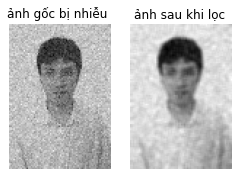

In [18]:
def Loc_Trung_binh_so_hoc(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc = np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            img_ket_qua_anh_loc[i,j] = np.mean(vung_anh_kich_thuoc_k)
    return img_ket_qua_anh_loc

img_nhieu=Gau_noisy_img
img_ket_qua = Loc_Trung_binh_so_hoc(img_nhieu,ksize=3)
plot_loc_nhieu(img_nhieu,img_ket_qua)

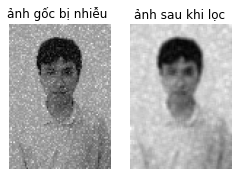

In [19]:
def Loc_Trung_binh_hinh_hoc(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc = np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_TB_cuc_bo = np.mean(vung_anh_kich_thuoc_k)
            gia_tri_loc = np.prod(vung_anh_kich_thuoc_k) ** (1.0 / m * n)
            if gia_tri_loc > gia_tri_TB_cuc_bo:
               img_ket_qua_anh_loc[i, j]= int(gia_tri_TB_cuc_bo)
            else:
               img_ket_qua_anh_loc[i,j] = int(gia_tri_loc)
    return img_ket_qua_anh_loc

img_nhieu=cv2.resize(Gam_noisy_img,(70,100))
img_ket_qua = Loc_Trung_binh_hinh_hoc(img_nhieu,ksize=3)
plot_loc_nhieu(img_nhieu,img_ket_qua)

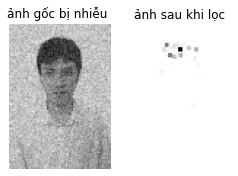

In [20]:
def Loc_Trung_binh_Harmonic(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc = np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_TB_cuc_bo = np.mean(vung_anh_kich_thuoc_k)
            gia_tri_loc = np.sum(m*n/1/vung_anh_kich_thuoc_k)
            if gia_tri_loc > gia_tri_TB_cuc_bo:
                img_ket_qua_anh_loc[i, j] = gia_tri_TB_cuc_bo
            else:
                img_ket_qua_anh_loc[i, j] = gia_tri_loc
    return img_ket_qua_anh_loc

img_nhieu=Gau_noisy_img
img_ket_qua = Loc_Trung_binh_Harmonic(img_nhieu,ksize=3)
plot_loc_nhieu(img_nhieu,img_ket_qua)

<ipython-input-21-357213fc8d47>:16: RuntimeWarning: invalid value encountered in double_scalars
  gia_tri_loc = img_bac_Q_1/img_bac_Q
<ipython-input-21-357213fc8d47>:8: RuntimeWarning: divide by zero encountered in power
  padded_img_bac_Q = np.power(padded_img, Q)


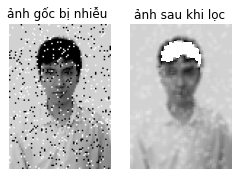

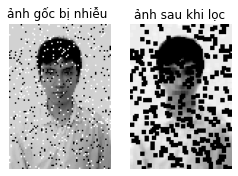

In [21]:
def Loc_Trung_binh_Contraharmonic(img, ksize,Q):
    m, n = img.shape
    img_ket_qua_anh_loc = np.zeros([m, n])

    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    padded_img_bac_Q_cong_1 = np.power(padded_img, Q+1)
    padded_img_bac_Q = np.power(padded_img, Q)

    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k_bac_Q_cong_1 = padded_img_bac_Q_cong_1[i:i+ksize,j:j+ksize]
            vung_anh_kich_thuoc_k_bac_Q = padded_img_bac_Q[i:i + ksize, j:j + ksize]
            img_bac_Q_1 = np.sum(vung_anh_kich_thuoc_k_bac_Q_cong_1)
            img_bac_Q = np.sum(vung_anh_kich_thuoc_k_bac_Q)
            gia_tri_loc = img_bac_Q_1/img_bac_Q
            img_ket_qua_anh_loc[i, j] = gia_tri_loc
    return img_ket_qua_anh_loc

ksize =3
Q1=0.1
Q2 = -1.0

img_nhieu=SP_noisy_img
img_ket_qua= Loc_Trung_binh_Contraharmonic(img_nhieu,ksize=3,Q=Q1)
plot_loc_nhieu(img_nhieu,img_ket_qua)

img_nhieu=SP_noisy_img
img_ket_qua= Loc_Trung_binh_Contraharmonic(img_nhieu,ksize=3,Q=Q2)
plot_loc_nhieu(img_nhieu,img_ket_qua)

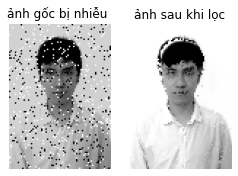

In [22]:
def Loc_Trung_Vi_thich_nghi(img,ksize,Smax):     # Định nghĩa hàm lọc trung vị thích nghi
    m,n = img.shape  # lấy 2 chiều của ảnh
    img_ket_qua_anh_loc= np.zeros([m, n]) # Tạo ma trận có kích thước bằng kích thước mxn
                                          # để lưu ảnh kết quả lọc
    h = (Smax-1)//2    # Thêm số pixel vào lề ảnh. Chú ý nếu bộ lọc có kích thước K thì:
                       # số pixel thêm vào mỗi lề ảnh (chú ý: ảnh có 4 lề) là (K-1)/2
    padded_img = np.pad(img,(h,h),mode='reflect')  #Thêm lề ảnh
    for i in range(m):
        for j in range(n):
            k = ksize
            vung_anh_kich_thuoc_k = padded_img[i:i+k,j:j+k] # tạo vùng lân cận (i,j)
                                                                     # Và cũng chính là vùng Sxy
            while True:
                # Bước A
                A1 = np.median(vung_anh_kich_thuoc_k) - np.min(vung_anh_kich_thuoc_k)
                A2 = np.median(vung_anh_kich_thuoc_k) - np.max(vung_anh_kich_thuoc_k)
                if A1 > 0 and A2 <0:
                    # Đi đến Bước B
                    # Chú ý: Giữ liệu các pixel số nguyên trong vùng [0..255]
                    # Nếu không chuyển sang int khi trừ thì chương trình sẽ cảnh báo
                    B1 = int(img[i, j]) - int(np.min(vung_anh_kich_thuoc_k))
                    B2 = int(img[i, j]) - int(np.max(vung_anh_kich_thuoc_k))
                    if B1>0 and B2 <0:
                        img_ket_qua_anh_loc[i,j] = img[i,j]
                    else:
                        img_ket_qua_anh_loc[i, j] = np.median(vung_anh_kich_thuoc_k)
                    break  # Thoát khỏi lặp
                else: # Quay lại bước A
                    k += 1
                    Snew = k*2+1
                    if Snew <= Smax :
                        vung_anh_kich_thuoc_k = padded_img[i:i+k,j:j+k]
                    else :
                        img_ket_qua_anh_loc[i,j] = np.median(vung_anh_kich_thuoc_k)
                        break # Thoát khỏi lặp
    return img_ket_qua_anh_loc


img_nhieu=SP_noisy_img
img_ket_qua= Loc_Trung_Vi_thich_nghi(img_nhieu,ksize=9,Smax=13)
plot_loc_nhieu(img_nhieu,img_ket_qua)

In [24]:
def Loc_Thich_Nghi_Cuc_Bo(img, ksize, phuong_sai_nhieu):
    m, n = img.shape
    img_ket_qua_anh_loc = np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            phuong_sai_cuc_bo = np.var(vung_anh_kich_thuoc_k)
            gia_tri_TB_cuc_bo = np.mean(vung_anh_kich_thuoc_k)
            if gia_tri_TB_cuc_bo  > phuong_sai_nhieu :
                img_ket_qua_anh_loc[i,j] = gia_tri_TB_cuc_bo
            else:
                img_ket_qua_anh_loc[i,j] = padded_img[i,j] - int((phuong_sai_nhieu / phuong_sai_cuc_bo) * (padded_img[i,j] - gia_tri_TB_cuc_bo))
    return img_ket_qua_anh_loc

# img_nhieu=SP_noisy_img
# img_ket_qua= Loc_Thich_Nghi_Cuc_Bo(img_nhieu,ksize=7,phuong_sai_nhieu=0.13)
# plot_loc_nhieu(img_nhieu,img_ket_qua)